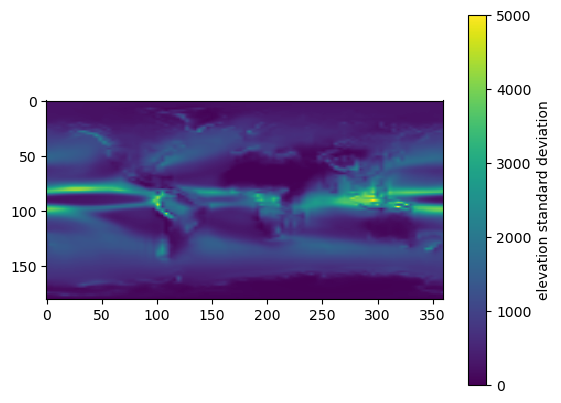

In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt


# 降水量データを読み込む
dataset = nc.Dataset('/work/a06/tsuda/m1/IPSL/annual_mean_pr_IPSL_1950.nc', 'r')
variable = dataset.variables['annual_mean_pr']
data_array = np.array(variable)
MAP = np.sum(data_array, axis=0)

# 緯度を反転させてpop_d1700AD.ascと合わせる
MAP = np.flipud(MAP)
MAP = np.roll(MAP, shift=180, axis=1)
#print(MAP[110,630])

# 経度をずらしてpop_d1700AD.ascと合わせる
#data_array = np.roll(data_array, shift=360, axis=1)
#data_array = np.roll(data_array, shift=360, axis=1)-273
# これで、population_dataとdata_arrayを用いて解析を進めることができます
# ...

# netCDFデータセットを閉じる
dataset.close()
# 描画
plt.imshow(MAP, cmap='viridis',vmin=0,vmax=5000,interpolation='none')  # viridisはカラーマップの一例
#plt.imshow(data_array, cmap='viridis',vmax=6000,interpolation='none')
plt.colorbar(label='elevation standard deviation')  # カラーバーを追加
#plt.title('elevation standard deviation')

# 軸ラベルなどを追加する場合はここに追加
#plt.xlim(500,600)
#plt.ylim(300,200)

# グラフを表示
plt.show()
